In [107]:
# Использование библиотек
import osmnx as ox # основная библиотека для скачивания графа дорог и дальнейшей работы с ним
import networkx as nx # библиотека для работы с графом, почти не использовали, т.к. больше работали с osmnx
import numpy as np # для работы с матрицами
from random import random # для случайного выбора узлов и случайного назначения весов при заполнении матрицы расстояний
import json # для записи некоторых данных было удобнее использовать json формат
import csv # для записи полученной матрицы смежности и списков смежности графа
import matplotlib.pyplot as plt # для визуализации графа
from random import randint
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster


In [52]:
place = {'city' : 'Kazan',
         'country' : 'Russia'}
# наш граф
G = ox.graph_from_place(place, network_type='drive')

In [36]:
buildings = ox.footprints.footprints_from_place(place, footprint_type='building', retain_invalid=False, which_result=1)

In [392]:
def choose_apartments(N):
    place = {'city' : 'Kazan',
         'country' : 'Russia'}
    G = ox.graph_from_place(place, network_type='drive')
    buildings = ox.footprints.footprints_from_place(place, footprint_type='building', retain_invalid=False, which_result=1)
    
    hospitals = []
    apartmentss = []
    n = 10000
    build = buildings.head(n)['building'].to_dict()

    for key,value in build.items():
        if value == 'hospital':
            hospitals.append(key)
        elif value == 'apartments':
            apartmentss.append(key)

    # реализация рандомного выбора
    hospital = hospitals[randint(0, len(hospitals)-1)]
    apartments = []
    for i in range(N):
        apartments.append(apartmentss[randint(0, len(apartmentss)-1)])
        
    # теперь берем координаты и находим ближайшие узлы
    
    a = buildings.head(n).to_dict()
    hospitals_dict = {}
    apartments_dict = {}
    
    coordinates = []
  
    bounds = a['geometry'][hospital].bounds 
    temp = []
    x = (bounds[1]+bounds[3])/2
    y = (bounds[0]+bounds[2])/2
    temp.append(x)
    temp.append(y)
    nearest_node = ox.get_nearest_node(G, (x, y))
    hospitals_dict[str(nearest_node)] = temp
    coordinates.append(temp)

    for i in apartments:
        bounds = a['geometry'][i].bounds
        temp = []
        x = (bounds[1]+bounds[3])/2
        y = (bounds[0]+bounds[2])/2
        temp.append(x)
        temp.append(y)
        nearest_node = ox.get_nearest_node(G, (x, y))
        apartments_dict[str(nearest_node)] = temp
        coordinates.append(temp)
        
    dict_for_items = {}
    dict_for_items['hosp'] = hospitals_dict
    dict_for_items['apart'] = apartments_dict
                                           
    with open('coordinates.json', 'w') as f:
        json.dump(dict_for_items, f)
    
    return coordinates


In [393]:
choose_apartments(15)

[[55.7522545, 49.1703111],
 [55.79265505, 49.168010300000006],
 [55.78563595, 49.22313135],
 [55.80342175, 49.186253449999995],
 [55.8330609, 49.15681765],
 [55.76606835, 49.20592235],
 [55.777956950000004, 49.1127281],
 [55.8606821, 49.08704655],
 [55.739055300000004, 49.1979318],
 [55.7684847, 49.24318875],
 [55.83535475, 49.07567065],
 [55.822435999999996, 49.051880600000004],
 [55.7882645, 49.183219199999996],
 [55.7700721, 49.224462849999995],
 [55.74515715, 49.227454449999996],
 [55.7700073, 49.15369285]]

In [394]:
def short_path_tree():
    
    with open('coordinates.json') as f:
        coordinates = json.load(f)
    
    hosp_c = list(coordinates['hosp'].values())[0]
    aparts_c = list(coordinates['apart'].values())
    
    nearest_node_hosp = ox.get_nearest_node(G, (hosp_c[0], hosp_c[1]))
    routes = []
    route_nodes = []

    for i in aparts_c:
        nearest_node = ox.get_nearest_node(G, (i[0], i[1]))
        route = nx.shortest_path(G,
                             nearest_node_hosp,
                             nearest_node, 
                             weight='length')
        node_coordinates = []
        node_coordinates.append([hosp_c[0], hosp_c[1]])
        route_nodes.append(route)
        for node in route:
            temp = []
            temp.append(G.nodes[node]['y'])
            temp.append(G.nodes[node]['x'])
            node_coordinates.append(temp)
        node_coordinates.append([i[0], i[1]])
        routes.append(node_coordinates)
    return routes

In [395]:
nodes = short_path_tree()

In [76]:
with open('coordinates.json') as f:
    coordinates = json.load(f)
    
hosp_c = list(coordinates['hosp'].values())[0]
aparts_c = list(coordinates['apart'].values())
    
nearest_node_hosp = ox.get_nearest_node(G, (hosp_c[0], hosp_c[1]))
routes = []
route_nodes = []

for i in aparts_c:
    nearest_node = ox.get_nearest_node(G, (i[0], i[1]))
    route = nx.shortest_path(G,
                         nearest_node_hosp,
                         nearest_node, 
                         weight='length')
    route_nodes.append(route)
    node_coordinates = []
    for node in route:
        temp = []
        temp.append(G.nodes[node]['y'])
        temp.append(G.nodes[node]['x'])
        node_coordinates.append(temp)
    routes.append(node_coordinates)

route_nodes

[[297148499,
  297148457,
  297148459,
  297148461,
  293663268,
  293663266,
  414845426,
  297148512,
  1005068920,
  1177320037],
 [297148499,
  295238875,
  451772938,
  295238883,
  295238865,
  295238857,
  695063658,
  704275011,
  283181358,
  1938631806,
  411306414,
  4624907683,
  698243751,
  694156340,
  293663233,
  295239468,
  2599967400,
  2334239557,
  2030000239,
  2058542806,
  1804054337,
  2367462054,
  295856456,
  720459675,
  306934762,
  639634098,
  639634096,
  952084912,
  952084957,
  952086861,
  952085654,
  952086592],
 [297148499,
  295238875,
  451772938,
  295238883,
  295238865,
  295238857,
  695063658,
  704275011,
  283181358,
  1938631806,
  411306414,
  4624907683,
  698243751,
  694156340,
  293663233,
  295239468,
  2599967400,
  293663230,
  295019326,
  1864098137,
  295019327,
  837831581,
  298122381,
  703559827,
  703559838,
  703564058,
  760183796,
  2519967899,
  2016206468,
  972498131,
  952084487,
  952083729,
  1428914503,
  8737

In [77]:
b = G.adj
dictionary = {}
i = 0
for key, value in b.items():
    if i == 10:
        break
    for key_a, value_a in value.items():

        if key not in dictionary:
            dictionary[key] = [{key_a:value_a[0]['length']}]
        else:
            dictionary[key].append({key_a:value_a[0]['length']}) 
            
nodes_list = list(G.nodes())
G_pd = nx.to_pandas_adjacency(G)
G_pd = G_pd.values

for i in range(len(G_pd)):
    for j in range(len(G_pd)):
        if G_pd[i][j] == 1:
            for k in range(len(dictionary[nodes_list[i]])):
                if nodes_list[j] in dictionary[nodes_list[i]][k].keys():
                    distance = dictionary[nodes_list[i]][k][nodes_list[j]]   
            G_pd[i][j] = distance
        if G_pd[i][j] == 0:
            G_pd[i][j] = 1000000
            
nodes_numbers = {}
for index,i in enumerate(nodes_list):
    nodes_numbers[i]=index 

In [396]:
def tree_weight(tree, matrix):
    end_points = []
    weight = 0
    paths_len = 0
    for i in tree:
        for j in range(len(i) - 1):
            if i[j+1] not in end_points:
                end_points.append(i[j+1])
                weight += matrix[nodes_numbers[i[j]]][nodes_numbers[i[j+1]]]
            paths_len += matrix[nodes_numbers[i[j]]][nodes_numbers[i[j+1]]]
            
    return weight, paths_len

In [85]:
w, p = tree_weight(route_nodes, G_pd)
print(w, p)

55116.70099999999 71267.04000000002


In [397]:
def short_path_tree():
    
    with open('coordinates.json') as f:
        coordinates = json.load(f)
    
    hosp_c = list(coordinates['hosp'].values())[0]
    aparts_c = list(coordinates['apart'].values())
    
    nearest_node_hosp = ox.get_nearest_node(G, (hosp_c[0], hosp_c[1]))
    routes = []
    route_nodes = []

    for i in aparts_c:
        nearest_node = ox.get_nearest_node(G, (i[0], i[1]))
        route = nx.shortest_path(G,
                             nearest_node_hosp,
                             nearest_node, 
                             weight='length')
        node_coordinates = []
        route_nodes.append(route)
        node_coordinates.append([hosp_c[0], hosp_c[1]])
        for node in route:
            temp = []
            temp.append(G.nodes[node]['y'])
            temp.append(G.nodes[node]['x'])
            node_coordinates.append(temp)
        node_coordinates.append([i[0], i[1]])
        routes.append(node_coordinates)
        
    tree_len, paths_len = tree_weight(route_nodes, G_pd)
    return routes, tree_len, paths_len

In [398]:
r, t, p = short_path_tree()

In [399]:
print(t, p)

58644.29299999996 102811.00400000004


In [400]:
aparts_routes = {}
with open('coordinates.json') as f:
    coordinates = json.load(f)
    
aparts_c = list(coordinates['apart'].values())
aparts_numbers = list(coordinates['apart'].keys())

short_path_matrix = np.zeros((len(aparts_c), len(aparts_c)))
numbers = {}
k = 0
for n in aparts_numbers:
    numbers[k] = n
    k += 1

for i in range(len(aparts_c)):
    number2 = 1
    nearest_node1 = ox.get_nearest_node(G, (aparts_c[i][0], aparts_c[i][1]))
    for j in range(len(aparts_c)):
        if aparts_c[i] != aparts_c[j]:
            r = {}
            nearest_node2 = ox.get_nearest_node(G, (aparts_c[j][0], aparts_c[j][1]))
            route = nx.shortest_path(G,
                                 nearest_node1,
                                 nearest_node2, 
                                 weight='length')
            r[nearest_node2] = route
            paths_len = 0
            for temp in range(len(route) - 1):
                paths_len += G_pd[nodes_numbers[route[temp]]][nodes_numbers[route[temp + 1]]]
            short_path_matrix[i][j] = paths_len       
    aparts_routes[nearest_node1] = r
    
short_path_matrix

array([[    0.   ,  5150.29 ,  1690.219,  6886.27 ,  4402.12 ,  5348.863,
        11571.838,  6814.156,  6654.927,  9758.097, 10269.743,  1518.052,
         5611.72 ,  7585.621,  4748.216],
       [ 5431.926,     0.   ,  4105.694,  7148.675,  5224.983, 10053.62 ,
        13636.689,  7914.304,  4125.397, 12328.512, 13889.492,  4634.848,
         4016.939,  5933.287,  9196.014],
       [ 1943.316,  5118.449,     0.   ,  5324.765,  5385.323,  6565.01 ,
        11812.779,  8167.405,  6623.086, 10504.602, 11485.89 ,  1964.585,
         5957.152,  8430.976,  6101.465],
       [ 6607.547,  9422.526,  4992.923,     0.   , 10254.498,  9307.249,
         6567.836, 12831.636, 11141.289,  5677.295,  7749.571,  6833.76 ,
        10261.229, 12946.58 , 10765.696],
       [ 4708.518,  3447.286,  5344.288, 10595.961,     0.   ,  8102.099,
        15553.187,  3864.289,  3031.679, 13739.446, 14251.092,  3405.738,
         1710.646,  4036.992,  5118.214],
       [ 4632.113,  9107.928,  6322.332,  9272.961

In [111]:
coordinates['apart']

{'1177320037': [55.780948949999996, 49.1459679],
 '952086592': [55.809214100000005, 49.08264955],
 '873775177': [55.820956249999995, 49.05783625],
 '283035624': [55.7549083, 49.17988635],
 '411321364': [55.8295935, 49.0591815],
 '838930068': [55.8197315, 48.889297299999996],
 '484260751': [55.81243645, 49.182382000000004],
 '492510328': [55.8404711, 49.13012],
 '981124159': [55.75629035, 49.20256],
 '295026514': [55.787098400000005, 49.15539495]}

In [401]:
matrix_cluster = []
for i in range(len(short_path_matrix)):
    for j in range(i + 1, len(short_path_matrix)):
        if short_path_matrix[i][j] < short_path_matrix[j][i]:
            matrix_cluster.append(short_path_matrix[i][j])
        else:
            matrix_cluster.append(short_path_matrix[j][i])

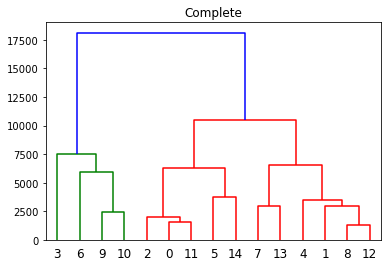

In [402]:
Z = linkage(matrix_cluster, 'complete')
plt.title('Complete')
dendrogram(Z)
plt.show()

In [404]:
num_clust = 2
Z2 = fcluster(Z, num_clust, 'maxclust')

c1 = [0, 0]
c2 = [0, 0]
k1 = 0
k2 = 0

# складываем соответствующие географические координаты узлов в соответствуюшие списки
for i in range(len(Z2)):
    key = numbers[i]
    coords = coordinates['apart'][key]
    if Z2[i] == 1:
        c1[0] += coords[0]
        c1[1] += coords[1]
        # и считаем количество узлов в кластере для нахождения средних координат
        k1 += 1
    else:
        c2[0] += coords[0]
        c2[1] += coords[1]
        k2 += 1
# находим среднее значение координат узлов, т. е., координаты наших центроидов
for i in range(len(c1)):
    c1[i] /= k1
for j in range(len(c2)):
    c2[j] /= k2
# ищем ближайшие узлы для наших центроидов
center1 = ox.get_nearest_node(G, (c1[0], c1[1]))
center2 = ox.get_nearest_node(G, (c2[0], c2[1]))

# Находим кратчайшие пути от объекта до центроидов
hosp_c = list(coordinates['hosp'].values())[0]
nearest_node_hosp = ox.get_nearest_node(G, (hosp_c[0], hosp_c[1]))
path1 = nx.shortest_path(G, nearest_node_hosp, center1, weight='length')
path2 = nx.shortest_path(G, nearest_node_hosp, center2, weight='length')
# считаем сумму этих путей
paths_len = 0
tree_weight = 0
end_points = []
for temp in range(len(path1) - 1):
    tree_weight += G_pd[nodes_numbers[path1[temp]]][nodes_numbers[path1[temp + 1]]]
    end_points.append(path1[temp])
    paths_len += G_pd[nodes_numbers[path1[temp]]][nodes_numbers[path1[temp + 1]]]

for temp in range(len(path2) - 1):
    if path2[temp] not in end_points:
        tree_weight += G_pd[nodes_numbers[path2[temp]]][nodes_numbers[path2[temp + 1]]]
        end_points.append(path2[temp])
    paths_len += G_pd[nodes_numbers[path2[temp]]][nodes_numbers[path2[temp + 1]]]

short_paths_c1 = {}
short_paths_c2 = {}

short_paths_len_c1 = 0
short_tree_len_c1 = 0

short_paths_len_c2 = 0
short_tree_len_c2 = 0

end_points = []
for i in range(len(Z2)):
    if Z2[i] == 1:
        temp_number = int(numbers[i])
        path_c1 = nx.shortest_path(G, center1, temp_number, weight='length') 
        short_paths_c1[temp_number] = path_c1
        
        for temp in range(len(path_c1) - 1):
            if path_c1[temp] not in end_points:
                short_tree_len_c1 += G_pd[nodes_numbers[path_c1[temp]]][nodes_numbers[path_c1[temp + 1]]]
                end_points.append(path_c1[temp])
            short_paths_len_c1 += G_pd[nodes_numbers[path_c1[temp]]][nodes_numbers[path_c1[temp + 1]]]
    else:
        temp_number = int(numbers[i])
        path_c2 = nx.shortest_path(G, center2, temp_number, weight='length') 
        short_paths_c2[temp_number] = path_c2
        
        for temp in range(len(path_c2) - 1):
            if path_c2[temp] not in end_points:
                short_tree_len_c2 += G_pd[nodes_numbers[path_c2[temp]]][nodes_numbers[path_c2[temp + 1]]]
                end_points.append(path_c2[temp])
            short_paths_len_c2 += G_pd[nodes_numbers[path_c2[temp]]][nodes_numbers[path_c2[temp + 1]]]
            
# длина дерева кратчайших путей от объекта до узлов кластера
tree_sum1 = tree_weight + short_tree_len_c1 + short_tree_len_c2
# сумма длин кратчайших путей
paths_sum1 = paths_len + short_paths_len_c1 + short_paths_len_c2

# сохраняю координаты всех путей
# сначала от больницы до центроид
node_coordinates = []

node_coordinates.append([hosp_c[0], hosp_c[1]])
for node in path1:
    temp = []
    temp.append(G.nodes[node]['y'])
    temp.append(G.nodes[node]['x'])
    node_coordinates.append(temp)
node_coordinates.append([c1[0], c1[1]])

routes_c1 = []
routes_c1.append(node_coordinates)
# теперь от центроид до узлов
for i in short_paths_c1.keys():
    node_coordinates = []
    node_coordinates.append([c1[0], c1[1]])
    r_value = short_paths_c1[i]
    
    for node in r_value:
        temp = []
        temp.append(G.nodes[node]['y'])
        temp.append(G.nodes[node]['x'])
        node_coordinates.append(temp)
    node_coordinates.append(coordinates['apart'][str(i)])
    routes_c1.append(node_coordinates)
    
node_coordinates = []
node_coordinates.append([hosp_c[0], hosp_c[1]])
for node in path2:
    temp = []
    temp.append(G.nodes[node]['y'])
    temp.append(G.nodes[node]['x'])
    node_coordinates.append(temp)
node_coordinates.append([c2[0], c2[1]])
routes.append(node_coordinates)


routes_c2 = []
routes_c2.append(node_coordinates)
# теперь от центроид до узлов
for i in short_paths_c2.keys():
    node_coordinates = []
    node_coordinates.append([c2[0], c2[1]])
    r_value = short_paths_c2[i]
    
    for node in r_value:
        temp = []
        temp.append(G.nodes[node]['y'])
        temp.append(G.nodes[node]['x'])
        node_coordinates.append(temp)
    node_coordinates.append(coordinates['apart'][str(i)])
    routes_c2.append(node_coordinates)

all_routes = []
all_routes.append(routes_c1)
all_routes.append(routes_c2)

In [145]:
short_paths_c1

{1177320037: [2402198114,
  411385860,
  411385856,
  411385858,
  411385859,
  295019720,
  292927475,
  908551636,
  295026532,
  962240346,
  962240170,
  962240188,
  414783361,
  293663269,
  293663268,
  293663266,
  414845426,
  297148512,
  1005068920,
  1177320037],
 952086592: [2402198114,
  411385860,
  411385856,
  701685269,
  698271176,
  698271168,
  295019739,
  701685262,
  295019730,
  297155623,
  1434054491,
  295239487,
  965715056,
  295239489,
  1804054337,
  2367462054,
  295856456,
  720459675,
  306934762,
  639634098,
  639634096,
  952084912,
  952084957,
  952086861,
  952085654,
  952086592],
 873775177: [2402198114,
  411385860,
  411385856,
  701685269,
  698271176,
  698271168,
  295019739,
  701685262,
  295019730,
  297155623,
  1434054491,
  295239487,
  965715056,
  295239489,
  1804054337,
  2367462054,
  295856456,
  720459675,
  306934762,
  952087345,
  952084888,
  306934759,
  711866685,
  1933319295,
  972498138,
  952084487,
  952083729,
  1

In [405]:
paths_sum1

72456.80500000002

In [133]:
numbers

{0: '1177320037',
 1: '952086592',
 2: '873775177',
 3: '283035624',
 4: '411321364',
 5: '838930068',
 6: '484260751',
 7: '492510328',
 8: '981124159',
 9: '295026514'}

In [411]:
def cluster2():
    aparts_routes = {}
    with open('coordinates.json') as f:
        coordinates = json.load(f)

    aparts_c = list(coordinates['apart'].values())
    aparts_numbers = list(coordinates['apart'].keys())

    short_path_matrix = np.zeros((len(aparts_c), len(aparts_c)))
    numbers = {}
    k = 0
    for n in aparts_numbers:
        numbers[k] = n
        k += 1

    for i in range(len(aparts_c)):
        number2 = 1
        nearest_node1 = ox.get_nearest_node(G, (aparts_c[i][0], aparts_c[i][1]))
        for j in range(len(aparts_c)):
            if aparts_c[i] != aparts_c[j]:
                r = {}
                nearest_node2 = ox.get_nearest_node(G, (aparts_c[j][0], aparts_c[j][1]))
                route = nx.shortest_path(G,
                                     nearest_node1,
                                     nearest_node2, 
                                     weight='length')
                r[nearest_node2] = route
                paths_len = 0
                for temp in range(len(route) - 1):
                    paths_len += G_pd[nodes_numbers[route[temp]]][nodes_numbers[route[temp + 1]]]
                short_path_matrix[i][j] = paths_len       
        aparts_routes[nearest_node1] = r
        
    matrix_cluster = []
    for i in range(len(short_path_matrix)):
        for j in range(i + 1, len(short_path_matrix)):
            if short_path_matrix[i][j] < short_path_matrix[j][i]:
                matrix_cluster.append(short_path_matrix[i][j])
            else:
                matrix_cluster.append(short_path_matrix[j][i])
                    
    Z = linkage(matrix_cluster, 'complete')
    
    num_clust = 2
    Z2 = fcluster(Z, num_clust, 'maxclust')

    c1 = [0, 0]
    c2 = [0, 0]
    k1 = 0
    k2 = 0

    # складываем соответствующие географические координаты узлов в соответствуюшие списки
    for i in range(len(Z2)):
        key = numbers[i]
        coords = coordinates['apart'][key]
        if Z2[i] == 1:
            c1[0] += coords[0]
            c1[1] += coords[1]
            # и считаем количество узлов в кластере для нахождения средних координат
            k1 += 1
        else:
            c2[0] += coords[0]
            c2[1] += coords[1]
            k2 += 1
    # находим среднее значение координат узлов, т. е., координаты наших центроидов
    for i in range(len(c1)):
        c1[i] /= k1
    for j in range(len(c2)):
        c2[j] /= k2
    # ищем ближайшие узлы для наших центроидов
    center1 = ox.get_nearest_node(G, (c1[0], c1[1]))
    center2 = ox.get_nearest_node(G, (c2[0], c2[1]))

    # Находим кратчайшие пути от объекта до центроидов
    hosp_c = list(coordinates['hosp'].values())[0]
    nearest_node_hosp = ox.get_nearest_node(G, (hosp_c[0], hosp_c[1]))
    path1 = nx.shortest_path(G, nearest_node_hosp, center1, weight='length')
    path2 = nx.shortest_path(G, nearest_node_hosp, center2, weight='length')
    # считаем сумму этих путей
    paths_len = 0
    tree_weight = 0
    end_points = []
    for temp in range(len(path1) - 1):
        tree_weight += G_pd[nodes_numbers[path1[temp]]][nodes_numbers[path1[temp + 1]]]
        end_points.append(path1[temp])
        paths_len += G_pd[nodes_numbers[path1[temp]]][nodes_numbers[path1[temp + 1]]]

    for temp in range(len(path2) - 1):
        if path2[temp] not in end_points:
            tree_weight += G_pd[nodes_numbers[path2[temp]]][nodes_numbers[path2[temp + 1]]]
            end_points.append(path2[temp])
        paths_len += G_pd[nodes_numbers[path2[temp]]][nodes_numbers[path2[temp + 1]]]

    short_paths_c1 = {}
    short_paths_c2 = {}

    short_paths_len_c1 = 0
    short_tree_len_c1 = 0

    short_paths_len_c2 = 0
    short_tree_len_c2 = 0

    end_points = []
    for i in range(len(Z2)):
        if Z2[i] == 1:
            temp_number = int(numbers[i])
            path_c1 = nx.shortest_path(G, center1, temp_number, weight='length') 
            short_paths_c1[temp_number] = path_c1

            for temp in range(len(path_c1) - 1):
                if path_c1[temp] not in end_points:
                    short_tree_len_c1 += G_pd[nodes_numbers[path_c1[temp]]][nodes_numbers[path_c1[temp + 1]]]
                    end_points.append(path_c1[temp])
                short_paths_len_c1 += G_pd[nodes_numbers[path_c1[temp]]][nodes_numbers[path_c1[temp + 1]]]
        else:
            temp_number = int(numbers[i])
            path_c2 = nx.shortest_path(G, center2, temp_number, weight='length') 
            short_paths_c2[temp_number] = path_c2

            for temp in range(len(path_c2) - 1):
                if path_c2[temp] not in end_points:
                    short_tree_len_c2 += G_pd[nodes_numbers[path_c2[temp]]][nodes_numbers[path_c2[temp + 1]]]
                    end_points.append(path_c2[temp])
                short_paths_len_c2 += G_pd[nodes_numbers[path_c2[temp]]][nodes_numbers[path_c2[temp + 1]]]

    # длина дерева кратчайших путей от объекта до узлов кластера
    tree_sum1 = tree_weight + short_tree_len_c1 + short_tree_len_c2
    # сумма длин кратчайших путей
    paths_sum1 = paths_len + short_paths_len_c1 + short_paths_len_c2

    # сохраняю координаты всех путей
    # сначала от больницы до центроид
    node_coordinates = []

    node_coordinates.append([hosp_c[0], hosp_c[1]])
    for node in path1:
        temp = []
        temp.append(G.nodes[node]['y'])
        temp.append(G.nodes[node]['x'])
        node_coordinates.append(temp)
    node_coordinates.append([c1[0], c1[1]])

    routes_c1 = []
    routes_c1.append(node_coordinates)
    # теперь от центроид до узлов
    for i in short_paths_c1.keys():
        node_coordinates = []
        node_coordinates.append([c1[0], c1[1]])
        r_value = short_paths_c1[i]

        for node in r_value:
            temp = []
            temp.append(G.nodes[node]['y'])
            temp.append(G.nodes[node]['x'])
            node_coordinates.append(temp)
        node_coordinates.append(coordinates['apart'][str(i)])
        routes_c1.append(node_coordinates)

    node_coordinates = []
    node_coordinates.append([hosp_c[0], hosp_c[1]])
    for node in path2:
        temp = []
        temp.append(G.nodes[node]['y'])
        temp.append(G.nodes[node]['x'])
        node_coordinates.append(temp)
    node_coordinates.append([c2[0], c2[1]])
    routes.append(node_coordinates)


    routes_c2 = []
    routes_c2.append(node_coordinates)
    # теперь от центроид до узлов
    for i in short_paths_c2.keys():
        node_coordinates = []
        node_coordinates.append([c2[0], c2[1]])
        r_value = short_paths_c2[i]

        for node in r_value:
            temp = []
            temp.append(G.nodes[node]['y'])
            temp.append(G.nodes[node]['x'])
            node_coordinates.append(temp)
        node_coordinates.append(coordinates['apart'][str(i)])
        routes_c2.append(node_coordinates)

    all_routes = []
    all_routes.append(routes_c1)
    all_routes.append(routes_c2)
    
    return [ [c1[0], c1[1]], [c2[0], c2[1]] ], all_routes, tree_sum1, paths_sum1

In [412]:
coordssss, allll_routes, treeee, pathsss = cluster2()

In [413]:
print(treeee)

52807.658


In [414]:
print(pathsss)

72456.80500000002


In [160]:
print(coordssss)

[[55.79910193333333, 49.132886500000005], [55.8197315, 48.889297299999996]]


In [236]:
def matrix_for_cluster():
    aparts_routes = {}
    with open('coordinates.json') as f:
        coordinates = json.load(f)

    aparts_c = list(coordinates['apart'].values())
    aparts_numbers = list(coordinates['apart'].keys())

    short_path_matrix = np.zeros((len(aparts_c), len(aparts_c)))
    numbers = {}
    k = 0
    for n in aparts_numbers:
        numbers[k] = n
        k += 1

    for i in range(len(aparts_c)):
        number2 = 1
        nearest_node1 = ox.get_nearest_node(G, (aparts_c[i][0], aparts_c[i][1]))
        for j in range(len(aparts_c)):
            if aparts_c[i] != aparts_c[j]:
                r = {}
                nearest_node2 = ox.get_nearest_node(G, (aparts_c[j][0], aparts_c[j][1]))
                route = nx.shortest_path(G,
                                     nearest_node1,
                                     nearest_node2, 
                                     weight='length')
                r[nearest_node2] = route
                paths_len = 0
                for temp in range(len(route) - 1):
                    paths_len += G_pd[nodes_numbers[route[temp]]][nodes_numbers[route[temp + 1]]]
                short_path_matrix[i][j] = paths_len       
        aparts_routes[nearest_node1] = r
        
    matrix_cluster = []
    for i in range(len(short_path_matrix)):
        for j in range(i + 1, len(short_path_matrix)):
            if short_path_matrix[i][j] < short_path_matrix[j][i]:
                matrix_cluster.append(short_path_matrix[i][j])
            else:
                matrix_cluster.append(short_path_matrix[j][i])
                
    m = {}
    m[0] = matrix_cluster
    
    with open('matrix_cluster.json', 'w') as f:
        json.dump(m, f)


In [237]:
matrix_for_cluster()

In [174]:
with open('matrix_cluster.json') as f:
        matrix_cluster = json.load(f)
matrix_cluster = list(matrix_cluster.values())[0]
matrix_cluster

[7019.847000000002,
 8981.765,
 4771.196000000001,
 9218.060000000001,
 20291.394999999997,
 5357.583999999999,
 8276.685,
 6719.24,
 1493.225,
 3815.592,
 10974.688000000002,
 4796.668999999999,
 16257.606000000002,
 8622.369999999999,
 5891.05,
 12354.897999999996,
 7622.133000000002,
 12780.997000000001,
 1580.6129999999998,
 15900.797999999997,
 9202.753999999999,
 5584.826,
 14161.206999999995,
 9582.773,
 13110.676000000001,
 24158.123,
 7958.0689999999995,
 12576.651999999996,
 2084.639,
 5237.291,
 15553.373999999994,
 8982.795999999998,
 4674.702,
 14490.885999999995,
 9635.059999999998,
 23697.34600000001,
 19821.026999999995,
 25538.33300000001,
 20959.89900000001,
 6338.189999999999,
 7574.790000000002,
 3879.787,
 13070.328,
 7579.242,
 5490.702000000002]

In [197]:
def cluster2():
    with open('coordinates.json') as f:
        coordinates = json.load(f)

    aparts_c = list(coordinates['apart'].values())
    aparts_numbers = list(coordinates['apart'].keys())
    
    numbers = {}
    k = 0
    for n in aparts_numbers:
        numbers[k] = n
        k += 1
        
    with open('matrix_cluster.json') as f:
        matrix_cluster = json.load(f)
    matrix_cluster = list(matrix_cluster.values())[0]
        
    Z = linkage(matrix_cluster, 'complete')
    num_clust = 2
    Z2 = fcluster(Z, num_clust, 'maxclust')
    print(Z2)

    c1 = [0, 0]
    c2 = [0, 0]
    k1 = 0
    k2 = 0

    # складываем соответствующие географические координаты узлов в соответствуюшие списки
    for i in range(len(Z2)):
        key = numbers[i]
        coords = coordinates['apart'][key]
        if Z2[i] == 1:
            c1[0] += coords[0]
            c1[1] += coords[1]
            # и считаем количество узлов в кластере для нахождения средних координат
            k1 += 1
        if Z2[i] == 2:
            c2[0] += coords[0]
            c2[1] += coords[1]
            k2 += 1
    # находим среднее значение координат узлов, т. е., координаты наших центроидов
    for i in range(len(c1)):
        c1[i] /= k1
    for j in range(len(c2)):
        c2[j] /= k2
    # ищем ближайшие узлы для наших центроидов
    center1 = ox.get_nearest_node(G, (c1[0], c1[1]))
    center2 = ox.get_nearest_node(G, (c2[0], c2[1]))

    # Находим кратчайшие пути от объекта до центроидов
    hosp_c = list(coordinates['hosp'].values())[0]
    nearest_node_hosp = ox.get_nearest_node(G, (hosp_c[0], hosp_c[1]))
    path1 = nx.shortest_path(G, nearest_node_hosp, center1, weight='length')
    path2 = nx.shortest_path(G, nearest_node_hosp, center2, weight='length')
    # считаем сумму этих путей
    paths_len = 0
    tree_weight = 0
    end_points = []
    for temp in range(len(path1) - 1):
        tree_weight += G_pd[nodes_numbers[path1[temp]]][nodes_numbers[path1[temp + 1]]]
        end_points.append(path1[temp])
        paths_len += G_pd[nodes_numbers[path1[temp]]][nodes_numbers[path1[temp + 1]]]

    for temp in range(len(path2) - 1):
        if path2[temp] not in end_points:
            tree_weight += G_pd[nodes_numbers[path2[temp]]][nodes_numbers[path2[temp + 1]]]
            end_points.append(path2[temp])
        paths_len += G_pd[nodes_numbers[path2[temp]]][nodes_numbers[path2[temp + 1]]]

    short_paths_c1 = {}
    short_paths_c2 = {}

    short_paths_len_c1 = 0
    short_tree_len_c1 = 0

    short_paths_len_c2 = 0
    short_tree_len_c2 = 0

    end_points = []
    for i in range(len(Z2)):
        temp_number = int(numbers[i])
        print(temp_number)
    for i in range(len(Z2)):
        if Z2[i] == 1:
            temp_number = int(numbers[i])
            try:
                path_c1 = nx.shortest_path(G, center1, temp_number, weight='length') 
                short_paths_c1[temp_number] = path_c1

                for temp in range(len(path_c1) - 1):
                    if path_c1[temp] not in end_points:
                        short_tree_len_c1 += G_pd[nodes_numbers[path_c1[temp]]][nodes_numbers[path_c1[temp + 1]]]
                        end_points.append(path_c1[temp])
                    short_paths_len_c1 += G_pd[nodes_numbers[path_c1[temp]]][nodes_numbers[path_c1[temp + 1]]]
            except nx.NetworkXNoPath:
                pass
        else:
            temp_number = int(numbers[i])
            try:
                path_c2 = nx.shortest_path(G, center2, temp_number, weight='length') 
                short_paths_c2[temp_number] = path_c2

                for temp in range(len(path_c2) - 1):
                    if path_c2[temp] not in end_points:
                        short_tree_len_c2 += G_pd[nodes_numbers[path_c2[temp]]][nodes_numbers[path_c2[temp + 1]]]
                        end_points.append(path_c2[temp])
                    short_paths_len_c2 += G_pd[nodes_numbers[path_c2[temp]]][nodes_numbers[path_c2[temp + 1]]]
            except nx.NetworkXNoPath:
                pass

    # длина дерева кратчайших путей от объекта до узлов кластера
    tree_sum1 = tree_weight + short_tree_len_c1 + short_tree_len_c2
    # сумма длин кратчайших путей
    paths_sum1 = paths_len + short_paths_len_c1 + short_paths_len_c2

    # сохраняю координаты всех путей
    # сначала от больницы до центроид
    node_coordinates = []

    node_coordinates.append([hosp_c[0], hosp_c[1]])
    for node in path1:
        temp = []
        temp.append(G.nodes[node]['y'])
        temp.append(G.nodes[node]['x'])
        node_coordinates.append(temp)
    node_coordinates.append([c1[0], c1[1]])

    routes_c1 = []
    routes_c1.append(node_coordinates)
    # теперь от центроид до узлов
    for i in short_paths_c1.keys():
        node_coordinates = []
        node_coordinates.append([c1[0], c1[1]])
        r_value = short_paths_c1[i]

        for node in r_value:
            temp = []
            temp.append(G.nodes[node]['y'])
            temp.append(G.nodes[node]['x'])
            node_coordinates.append(temp)
        node_coordinates.append(coordinates['apart'][str(i)])
        routes_c1.append(node_coordinates)

    node_coordinates = []
    node_coordinates.append([hosp_c[0], hosp_c[1]])
    for node in path2:
        temp = []
        temp.append(G.nodes[node]['y'])
        temp.append(G.nodes[node]['x'])
        node_coordinates.append(temp)
    node_coordinates.append([c2[0], c2[1]])


    routes_c2 = []
    routes_c2.append(node_coordinates)
    # теперь от центроид до узлов
    for i in short_paths_c2.keys():
        node_coordinates = []
        node_coordinates.append([c2[0], c2[1]])
        r_value = short_paths_c2[i]

        for node in r_value:
            temp = []
            temp.append(G.nodes[node]['y'])
            temp.append(G.nodes[node]['x'])
            node_coordinates.append(temp)
        node_coordinates.append(coordinates['apart'][str(i)])
        routes_c2.append(node_coordinates)

    all_routes = []
    all_routes.append(routes_c1)
    all_routes.append(routes_c2)
    
    return [hosp_c[0], hosp_c[1]], [[c1[0], c1[1]], [c2[0], c2[1]]], all_routes, tree_sum1, paths_sum1

In [188]:
cluster()

1177320037
952086592
873775177
283035624
411321364
838930068
484260751
492510328
981124159
295026514


([55.79000255, 49.144004949999996],
 [55.79910193333333, 49.132886500000005],
 [55.8197315, 48.889297299999996],
 [[[[55.79000255, 49.144004949999996],
    [55.7895277, 49.1436538],
    [55.7906184, 49.1414607],
    [55.7925406, 49.1422508],
    [55.7929387, 49.1424564],
    [55.7936574, 49.1428383],
    [55.7941934, 49.1438475],
    [55.7943005, 49.1440513],
    [55.7948998, 49.1395491],
    [55.7960152, 49.1397034],
    [55.7960814, 49.1390812],
    [55.7962719, 49.1370459],
    [55.7963919, 49.1357645],
    [55.7966238, 49.1333107],
    [55.7991928, 49.1316768],
    [55.79910193333333, 49.132886500000005]],
   [[55.79910193333333, 49.132886500000005],
    [55.7991928, 49.1316768],
    [55.7966238, 49.1333107],
    [55.7969196, 49.129932],
    [55.7958096, 49.1296173],
    [55.7955114, 49.1329451],
    [55.7952655, 49.1355119],
    [55.7951266, 49.1369643],
    [55.7949047, 49.1387705],
    [55.7941934, 49.1438475],
    [55.7933101, 49.1481493],
    [55.7929467, 49.1494046],
    [55.

In [181]:
num_clust = 3
Z3 = fcluster(Z, num_clust, 'maxclust')
Z3

array([2, 1, 1, 2, 1, 3, 2, 1, 2, 2], dtype=int32)

In [203]:
def cluster3():
    with open('coordinates.json') as f:
        coordinates = json.load(f)

    aparts_c = list(coordinates['apart'].values())
    aparts_numbers = list(coordinates['apart'].keys())
    
    numbers = {}
    k = 0
    for n in aparts_numbers:
        numbers[k] = n
        k += 1
        
    with open('matrix_cluster.json') as f:
        matrix_cluster = json.load(f)
    matrix_cluster = list(matrix_cluster.values())[0]
        
    Z = linkage(matrix_cluster, 'complete')
    num_clust = 3
    Z2 = fcluster(Z, num_clust, 'maxclust')

    c1 = [0, 0]
    c2 = [0, 0]
    c3 = [0, 0]
    k1=0
    k2=0
    k3=0

    # складываем соответствующие географические координаты узлов в соответствуюшие списки
    for i in range(len(Z2)):
        key = numbers[i]
        coords = coordinates['apart'][key]
        if Z2[i] == 1:
            c1[0] += coords[0]
            c1[1] += coords[1]
            # и считаем количество узлов в кластере для нахождения средних координат
            k1 += 1
        if Z2[i] == 2:
            c2[0] += coords[0]
            c2[1] += coords[1]
            k2 += 1
        if Z2[i] == 3:
            c3[0] += coords[0]
            c3[1] += coords[1]
            k3 += 1
    # находим среднее значение координат узлов, т. е., координаты наших центроидов
    for i in range(len(c1)):
        c1[i] /= k1
    for j in range(len(c2)):
        c2[j] /= k2
    for g in range(len(c3)):
        c3[g] /= k3
    # ищем ближайшие узлы для наших центроидов
    center1 = ox.get_nearest_node(G, (c1[0], c1[1]))
    center2 = ox.get_nearest_node(G, (c2[0], c2[1]))
    center3 = ox.get_nearest_node(G, (c3[0], c3[1]))

    # Находим кратчайшие пути от объекта до центроидов
    hosp_c = list(coordinates['hosp'].values())[0]
    nearest_node_hosp = ox.get_nearest_node(G, (hosp_c[0], hosp_c[1]))
    path1 = nx.shortest_path(G, nearest_node_hosp, center1, weight='length')
    path2 = nx.shortest_path(G, nearest_node_hosp, center2, weight='length')
    path3 = nx.shortest_path(G, nearest_node_hosp, center3, weight='length')
    # считаем сумму этих путей
    paths_len = 0
    tree_weight = 0
    end_points = []
    for temp in range(len(path1) - 1):
        tree_weight += G_pd[nodes_numbers[path1[temp]]][nodes_numbers[path1[temp + 1]]]
        end_points.append(path1[temp])
        paths_len += G_pd[nodes_numbers[path1[temp]]][nodes_numbers[path1[temp + 1]]]

    for temp in range(len(path2) - 1):
        if path2[temp] not in end_points:
            tree_weight += G_pd[nodes_numbers[path2[temp]]][nodes_numbers[path2[temp + 1]]]
            end_points.append(path2[temp])
        paths_len += G_pd[nodes_numbers[path2[temp]]][nodes_numbers[path2[temp + 1]]]
        
    for temp in range(len(path3) - 1):
        if path3[temp] not in end_points:
            tree_weight += G_pd[nodes_numbers[path3[temp]]][nodes_numbers[path3[temp + 1]]]
            end_points.append(path3[temp])
        paths_len += G_pd[nodes_numbers[path3[temp]]][nodes_numbers[path3[temp + 1]]]

    short_paths_c1 = {}
    short_paths_c2 = {}
    short_paths_c3 = {}

    short_paths_len_c1 = 0
    short_tree_len_c1 = 0

    short_paths_len_c2 = 0
    short_tree_len_c2 = 0
    
    short_paths_len_c3 = 0
    short_tree_len_c3 = 0

    end_points = []
    for i in range(len(Z2)):
        if Z2[i] == 1:
            temp_number = int(numbers[i])
            try:
                path_c1 = nx.shortest_path(G, center1, temp_number, weight='length') 
                short_paths_c1[temp_number] = path_c1

                for temp in range(len(path_c1) - 1):
                    if path_c1[temp] not in end_points:
                        short_tree_len_c1 += G_pd[nodes_numbers[path_c1[temp]]][nodes_numbers[path_c1[temp + 1]]]
                        end_points.append(path_c1[temp])
                    short_paths_len_c1 += G_pd[nodes_numbers[path_c1[temp]]][nodes_numbers[path_c1[temp + 1]]]
            except nx.NetworkXNoPath:
                pass
        if Z2[i] == 2:
            temp_number = int(numbers[i])
            try:
                path_c2 = nx.shortest_path(G, center2, temp_number, weight='length') 
                short_paths_c2[temp_number] = path_c2

                for temp in range(len(path_c2) - 1):
                    if path_c2[temp] not in end_points:
                        short_tree_len_c2 += G_pd[nodes_numbers[path_c2[temp]]][nodes_numbers[path_c2[temp + 1]]]
                        end_points.append(path_c2[temp])
                    short_paths_len_c2 += G_pd[nodes_numbers[path_c2[temp]]][nodes_numbers[path_c2[temp + 1]]]
            except nx.NetworkXNoPath:
                pass
        else:
            temp_number = int(numbers[i])
            try:
                path_c3 = nx.shortest_path(G, center3, temp_number, weight='length') 
                short_paths_c3[temp_number] = path_c3

                for temp in range(len(path_c3) - 1):
                    if path_c3[temp] not in end_points:
                        short_tree_len_c3 += G_pd[nodes_numbers[path_c3[temp]]][nodes_numbers[path_c3[temp + 1]]]
                        end_points.append(path_c3[temp])
                    short_paths_len_c3 += G_pd[nodes_numbers[path_c3[temp]]][nodes_numbers[path_c3[temp + 1]]]
            except nx.NetworkXNoPath:
                pass

    # длина дерева кратчайших путей от объекта до узлов кластера
    tree_sum1 = tree_weight + short_tree_len_c1 + short_tree_len_c2 + short_tree_len_c3
    # сумма длин кратчайших путей
    paths_sum1 = paths_len + short_paths_len_c1 + short_paths_len_c2 + short_paths_len_c3

    # сохраняю координаты всех путей
    # сначала от больницы до центроид
    node_coordinates = []

    node_coordinates.append([hosp_c[0], hosp_c[1]])
    for node in path1:
        temp = []
        temp.append(G.nodes[node]['y'])
        temp.append(G.nodes[node]['x'])
        node_coordinates.append(temp)
    node_coordinates.append([c1[0], c1[1]])

    routes_c1 = []
    routes_c1.append(node_coordinates)
    # теперь от центроид до узлов
    for i in short_paths_c1.keys():
        node_coordinates = []
        node_coordinates.append([c1[0], c1[1]])
        r_value = short_paths_c1[i]

        for node in r_value:
            temp = []
            temp.append(G.nodes[node]['y'])
            temp.append(G.nodes[node]['x'])
            node_coordinates.append(temp)
        node_coordinates.append(coordinates['apart'][str(i)])
        routes_c1.append(node_coordinates)

    node_coordinates = []
    node_coordinates.append([hosp_c[0], hosp_c[1]])
    for node in path2:
        temp = []
        temp.append(G.nodes[node]['y'])
        temp.append(G.nodes[node]['x'])
        node_coordinates.append(temp)
    node_coordinates.append([c2[0], c2[1]])


    routes_c2 = []
    routes_c2.append(node_coordinates)
    # теперь от центроид до узлов
    for i in short_paths_c2.keys():
        node_coordinates = []
        node_coordinates.append([c2[0], c2[1]])
        r_value = short_paths_c2[i]

        for node in r_value:
            temp = []
            temp.append(G.nodes[node]['y'])
            temp.append(G.nodes[node]['x'])
            node_coordinates.append(temp)
        node_coordinates.append(coordinates['apart'][str(i)])
        routes_c2.append(node_coordinates)
    
    
    node_coordinates = []
    node_coordinates.append([hosp_c[0], hosp_c[1]])
    for node in path3:
        temp = []
        temp.append(G.nodes[node]['y'])
        temp.append(G.nodes[node]['x'])
        node_coordinates.append(temp)
    node_coordinates.append([c3[0], c3[1]])


    routes_c3 = []
    routes_c3.append(node_coordinates)
    # теперь от центроид до узлов
    for i in short_paths_c3.keys():
        node_coordinates = []
        node_coordinates.append([c3[0], c3[1]])
        r_value = short_paths_c3[i]

        for node in r_value:
            temp = []
            temp.append(G.nodes[node]['y'])
            temp.append(G.nodes[node]['x'])
            node_coordinates.append(temp)
        node_coordinates.append(coordinates['apart'][str(i)])
        routes_c3.append(node_coordinates)

    all_routes = []
    all_routes.append(routes_c1)
    all_routes.append(routes_c2)
    all_routes.append(routes_c3)
    
    return [hosp_c[0], hosp_c[1]], [[c1[0], c1[1]], [c2[0], c2[1]], [c3[0], c3[1]]], all_routes, tree_sum1, paths_sum1

In [196]:
cluster3()

([55.79000255, 49.144004949999996],
 [[55.8250587375, 49.082446825],
  [11.155667298000001, 9.834647648],
  [279.11996645, 245.2190846]],
 [[[[55.79000255, 49.144004949999996],
    [55.7895277, 49.1436538],
    [55.7906184, 49.1414607],
    [55.7897118, 49.1377312],
    [55.7893736, 49.1364228],
    [55.7887506, 49.1340922],
    [55.7870838, 49.1252683],
    [55.7873343, 49.1245858],
    [55.7876764, 49.1238077],
    [55.7878549, 49.1233855],
    [55.7879498, 49.1231412],
    [55.7886867, 49.1215651],
    [55.790584, 49.1177275],
    [55.7915974, 49.1154749],
    [55.7927016, 49.1130773],
    [55.7935312, 49.1111735],
    [55.7957749, 49.1064522],
    [55.7964245, 49.1035745],
    [55.7970313, 49.1028571],
    [55.7976292, 49.1023466],
    [55.7981661, 49.1020774],
    [55.803827, 49.1018339],
    [55.8116976, 49.1028028],
    [55.8126387, 49.1021275],
    [55.8132724, 49.1015536],
    [55.8153967, 49.0999175],
    [55.8179885, 49.0981408],
    [55.8180778, 49.0980787],
    [55.8186988

In [204]:
path_c2 = nx.shortest_path(G, center2, 1177320037, weight='length')

NetworkXNoPath: No path to 1177320037.

In [198]:
aparts_numbers

['1177320037',
 '952086592',
 '873775177',
 '283035624',
 '411321364',
 '838930068',
 '484260751',
 '492510328',
 '981124159',
 '295026514']

In [200]:
G.nodes[1177320037]

{'y': 55.7805483, 'x': 49.1461549, 'osmid': 1177320037}

In [201]:
G.nodes[center2]

{'y': 55.7903003, 'x': 48.8407238, 'osmid': 2384188714, 'highway': 'milestone'}

In [238]:
def cluster5():
    with open('coordinates.json') as f:
        coordinates = json.load(f)

    aparts_c = list(coordinates['apart'].values())
    aparts_numbers = list(coordinates['apart'].keys())
    
    numbers = {}
    k = 0
    for n in aparts_numbers:
        numbers[k] = n
        k += 1
        
    with open('matrix_cluster.json') as f:
        matrix_cluster = json.load(f)
    matrix_cluster = list(matrix_cluster.values())[0]
        
    Z = linkage(matrix_cluster, 'complete')
    num_clust = 5
    Z2 = fcluster(Z, num_clust, 'maxclust')

    c1 = [0, 0]
    c2 = [0, 0]
    c3 = [0, 0]
    c4 = [0, 0]
    c5 = [0, 0]

    k1=0
    k2=0
    k3=0
    k4=0
    k5=0

    # складываем соответствующие географические координаты узлов в соответствуюшие списки
    for i in range(len(Z2)):
        key = numbers[i]
        coords = coordinates['apart'][key]
        if Z2[i] == 1:
            c1[0] += coords[0]
            c1[1] += coords[1]
            # и считаем количество узлов в кластере для нахождения средних координат
            k1 += 1
        if Z2[i] == 2:
            c2[0] += coords[0]
            c2[1] += coords[1]
            k2 += 1
        if Z2[i] == 3:
            c3[0] += coords[0]
            c3[1] += coords[1]
            k3 += 1
        if Z2[i] == 4:
            c4[0] += coords[0]
            c4[1] += coords[1]
            # и считаем количество узлов в кластере для нахождения средних координат
            k4 += 1
        if Z2[i] == 5:
            c5[0] += coords[0]
            c5[1] += coords[1]
            k5 += 1
        
    print(k1, k2, k3, k4, k5)  
    # находим среднее значение координат узлов, т. е., координаты наших центроидов
    for i in range(len(c1)):
        c1[i] /= k1
    for j in range(len(c2)):
        c2[j] /= k2
    for g in range(len(c3)):
        c3[g] /= k3
    for i in range(len(c4)):
        c4[i] /= k4
    for j in range(len(c5)):
        c5[j] /= k5
    # ищем ближайшие узлы для наших центроидов
    center1 = ox.get_nearest_node(G, (c1[0], c1[1]))
    center2 = ox.get_nearest_node(G, (c2[0], c2[1]))
    center3 = ox.get_nearest_node(G, (c3[0], c3[1]))
    center4 = ox.get_nearest_node(G, (c4[0], c4[1]))
    center5 = ox.get_nearest_node(G, (c5[0], c5[1]))

    # Находим кратчайшие пути от объекта до центроидов
    hosp_c = list(coordinates['hosp'].values())[0]
    nearest_node_hosp = ox.get_nearest_node(G, (hosp_c[0], hosp_c[1]))
    path1 = nx.shortest_path(G, nearest_node_hosp, center1, weight='length')
    path2 = nx.shortest_path(G, nearest_node_hosp, center2, weight='length')
    path3 = nx.shortest_path(G, nearest_node_hosp, center3, weight='length')
    path4 = nx.shortest_path(G, nearest_node_hosp, center4, weight='length')
    path5 = nx.shortest_path(G, nearest_node_hosp, center5, weight='length')
    # считаем сумму этих путей
    paths_len = 0
    tree_weight = 0
    end_points = []
    for temp in range(len(path1) - 1):
        tree_weight += G_pd[nodes_numbers[path1[temp]]][nodes_numbers[path1[temp + 1]]]
        end_points.append(path1[temp])
        paths_len += G_pd[nodes_numbers[path1[temp]]][nodes_numbers[path1[temp + 1]]]

    for temp in range(len(path2) - 1):
        if path2[temp] not in end_points:
            tree_weight += G_pd[nodes_numbers[path2[temp]]][nodes_numbers[path2[temp + 1]]]
            end_points.append(path2[temp])
        paths_len += G_pd[nodes_numbers[path2[temp]]][nodes_numbers[path2[temp + 1]]]
        
    for temp in range(len(path3) - 1):
        if path3[temp] not in end_points:
            tree_weight += G_pd[nodes_numbers[path3[temp]]][nodes_numbers[path3[temp + 1]]]
            end_points.append(path3[temp])
        paths_len += G_pd[nodes_numbers[path3[temp]]][nodes_numbers[path3[temp + 1]]]
        
    for temp in range(len(path4) - 1):
        if path4[temp] not in end_points:
            tree_weight += G_pd[nodes_numbers[path4[temp]]][nodes_numbers[path4[temp + 1]]]
            end_points.append(path4[temp])
        paths_len += G_pd[nodes_numbers[path4[temp]]][nodes_numbers[path4[temp + 1]]]
    
    for temp in range(len(path5) - 1):
        if path5[temp] not in end_points:
            tree_weight += G_pd[nodes_numbers[path5[temp]]][nodes_numbers[path5[temp + 1]]]
            end_points.append(path5[temp])
        paths_len += G_pd[nodes_numbers[path5[temp]]][nodes_numbers[path5[temp + 1]]]

    short_paths_c1 = {}
    short_paths_c2 = {}
    short_paths_c3 = {}
    short_paths_c4 = {}
    short_paths_c5 = {}

    short_paths_len_c1 = 0
    short_tree_len_c1 = 0

    short_paths_len_c2 = 0
    short_tree_len_c2 = 0
    
    short_paths_len_c3 = 0
    short_tree_len_c3 = 0
    
    short_paths_len_c4 = 0
    short_tree_len_c4 = 0
    
    short_paths_len_c5 = 0
    short_tree_len_c5 = 0

    end_points = []
    for i in range(len(Z2)):
        if Z2[i] == 1:
            temp_number = int(numbers[i])
            try:
                path_c1 = nx.shortest_path(G, center1, temp_number, weight='length') 
                short_paths_c1[temp_number] = path_c1

                for temp in range(len(path_c1) - 1):
                    if path_c1[temp] not in end_points:
                        short_tree_len_c1 += G_pd[nodes_numbers[path_c1[temp]]][nodes_numbers[path_c1[temp + 1]]]
                        end_points.append(path_c1[temp])
                    short_paths_len_c1 += G_pd[nodes_numbers[path_c1[temp]]][nodes_numbers[path_c1[temp + 1]]]
            except nx.NetworkXNoPath:
                pass
        if Z2[i] == 2:
            temp_number = int(numbers[i])
            try:
                path_c2 = nx.shortest_path(G, center2, temp_number, weight='length') 
                short_paths_c2[temp_number] = path_c2

                for temp in range(len(path_c2) - 1):
                    if path_c2[temp] not in end_points:
                        short_tree_len_c2 += G_pd[nodes_numbers[path_c2[temp]]][nodes_numbers[path_c2[temp + 1]]]
                        end_points.append(path_c2[temp])
                    short_paths_len_c2 += G_pd[nodes_numbers[path_c2[temp]]][nodes_numbers[path_c2[temp + 1]]]
            except nx.NetworkXNoPath:
                pass
        if Z2[i] == 3:
            temp_number = int(numbers[i])
            try:
                path_c3 = nx.shortest_path(G, center3, temp_number, weight='length') 
                short_paths_c3[temp_number] = path_c3

                for temp in range(len(path_c3) - 1):
                    if path_c3[temp] not in end_points:
                        short_tree_len_c3 += G_pd[nodes_numbers[path_c3[temp]]][nodes_numbers[path_c3[temp + 1]]]
                        end_points.append(path_c3[temp])
                    short_paths_len_c3 += G_pd[nodes_numbers[path_c3[temp]]][nodes_numbers[path_c3[temp + 1]]]
            except nx.NetworkXNoPath:
                pass
        if Z2[i] == 4:
            temp_number = int(numbers[i])
            try:
                path_c4 = nx.shortest_path(G, center4, temp_number, weight='length') 
                short_paths_c4[temp_number] = path_c4

                for temp in range(len(path_c4) - 1):
                    if path_c4[temp] not in end_points:
                        short_tree_len_c4 += G_pd[nodes_numbers[path_c4[temp]]][nodes_numbers[path_c4[temp + 1]]]
                        end_points.append(path_c4[temp])
                    short_paths_len_c4 += G_pd[nodes_numbers[path_c4[temp]]][nodes_numbers[path_c4[temp + 1]]]
            except nx.NetworkXNoPath:
                pass
        else:
            temp_number = int(numbers[i])
            try:
                path_c5 = nx.shortest_path(G, center5, temp_number, weight='length') 
                short_paths_c5[temp_number] = path_c5

                for temp in range(len(path_c5) - 1):
                    if path_c5[temp] not in end_points:
                        short_tree_len_c5 += G_pd[nodes_numbers[path_c5[temp]]][nodes_numbers[path_c5[temp + 1]]]
                        end_points.append(path_c5[temp])
                    short_paths_len_c5 += G_pd[nodes_numbers[path_c5[temp]]][nodes_numbers[path_c5[temp + 1]]]
            except nx.NetworkXNoPath:
                pass

    # длина дерева кратчайших путей от объекта до узлов кластера
    tree_sum1 = tree_weight + short_tree_len_c1 + short_tree_len_c2 + short_tree_len_c3 + short_tree_len_c4 + short_tree_len_c5
    # сумма длин кратчайших путей
    paths_sum1 = paths_len + short_paths_len_c1 + short_paths_len_c2 + short_paths_len_c3 + short_paths_len_c4 + short_paths_len_c5

    # сохраняю координаты всех путей
    # сначала от больницы до центроид
    node_coordinates = []

    node_coordinates.append([hosp_c[0], hosp_c[1]])
    for node in path1:
        temp = []
        temp.append(G.nodes[node]['y'])
        temp.append(G.nodes[node]['x'])
        node_coordinates.append(temp)
    node_coordinates.append([c1[0], c1[1]])

    routes_c1 = []
    routes_c1.append(node_coordinates)
    # теперь от центроид до узлов
    for i in short_paths_c1.keys():
        node_coordinates = []
        node_coordinates.append([c1[0], c1[1]])
        r_value = short_paths_c1[i]

        for node in r_value:
            temp = []
            temp.append(G.nodes[node]['y'])
            temp.append(G.nodes[node]['x'])
            node_coordinates.append(temp)
        node_coordinates.append(coordinates['apart'][str(i)])
        routes_c1.append(node_coordinates)

    node_coordinates = []
    node_coordinates.append([hosp_c[0], hosp_c[1]])
    for node in path2:
        temp = []
        temp.append(G.nodes[node]['y'])
        temp.append(G.nodes[node]['x'])
        node_coordinates.append(temp)
    node_coordinates.append([c2[0], c2[1]])


    routes_c2 = []
    routes_c2.append(node_coordinates)
    # теперь от центроид до узлов
    for i in short_paths_c2.keys():
        node_coordinates = []
        node_coordinates.append([c2[0], c2[1]])
        r_value = short_paths_c2[i]

        for node in r_value:
            temp = []
            temp.append(G.nodes[node]['y'])
            temp.append(G.nodes[node]['x'])
            node_coordinates.append(temp)
        node_coordinates.append(coordinates['apart'][str(i)])
        routes_c2.append(node_coordinates)
    
    
    node_coordinates = []
    node_coordinates.append([hosp_c[0], hosp_c[1]])
    for node in path3:
        temp = []
        temp.append(G.nodes[node]['y'])
        temp.append(G.nodes[node]['x'])
        node_coordinates.append(temp)
    node_coordinates.append([c3[0], c3[1]])


    routes_c3 = []
    routes_c3.append(node_coordinates)
    # теперь от центроид до узлов
    for i in short_paths_c3.keys():
        node_coordinates = []
        node_coordinates.append([c3[0], c3[1]])
        r_value = short_paths_c3[i]

        for node in r_value:
            temp = []
            temp.append(G.nodes[node]['y'])
            temp.append(G.nodes[node]['x'])
            node_coordinates.append(temp)
        node_coordinates.append(coordinates['apart'][str(i)])
        routes_c3.append(node_coordinates)
        
        
    node_coordinates = []
    node_coordinates.append([hosp_c[0], hosp_c[1]])
    for node in path4:
        temp = []
        temp.append(G.nodes[node]['y'])
        temp.append(G.nodes[node]['x'])
        node_coordinates.append(temp)
    node_coordinates.append([c4[0], c4[1]])


    routes_c4 = []
    routes_c4.append(node_coordinates)
    # теперь от центроид до узлов
    for i in short_paths_c4.keys():
        node_coordinates = []
        node_coordinates.append([c4[0], c4[1]])
        r_value = short_paths_c4[i]

        for node in r_value:
            temp = []
            temp.append(G.nodes[node]['y'])
            temp.append(G.nodes[node]['x'])
            node_coordinates.append(temp)
        node_coordinates.append(coordinates['apart'][str(i)])
        routes_c4.append(node_coordinates)
    
    
    node_coordinates = []
    node_coordinates.append([hosp_c[0], hosp_c[1]])
    for node in path5:
        temp = []
        temp.append(G.nodes[node]['y'])
        temp.append(G.nodes[node]['x'])
        node_coordinates.append(temp)
    node_coordinates.append([c5[0], c5[1]])


    routes_c5 = []
    routes_c5.append(node_coordinates)
    # теперь от центроид до узлов
    for i in short_paths_c5.keys():
        node_coordinates = []
        node_coordinates.append([c5[0], c5[1]])
        r_value = short_paths_c5[i]

        for node in r_value:
            temp = []
            temp.append(G.nodes[node]['y'])
            temp.append(G.nodes[node]['x'])
            node_coordinates.append(temp)
        node_coordinates.append(coordinates['apart'][str(i)])
        routes_c5.append(node_coordinates)

    all_routes = []
    all_routes.append(routes_c1)
    all_routes.append(routes_c2)
    all_routes.append(routes_c3)
    all_routes.append(routes_c4)
    all_routes.append(routes_c5)
    
    return [hosp_c[0], hosp_c[1]], [[c1[0], c1[1]], [c2[0], c2[1]], [c3[0], c3[1]], [c4[0], c4[1]], [c5[0], c5[1]]], all_routes, tree_sum1, paths_sum1
    

In [239]:
cluster5()

2 2 1 0 0


ZeroDivisionError: division by zero

In [228]:
G.nodes[838929863]

{'y': 55.8217806, 'x': 48.8906147, 'osmid': 838929863}

In [240]:
num_clust = 5
Z2 = fcluster(Z, num_clust, 'maxclust')
Z2

array([1, 2, 3, 1, 2], dtype=int32)

In [241]:
num_clust = 2
Z2 = fcluster(Z, num_clust, 'maxclust')
Z2

array([1, 2, 2, 1, 2], dtype=int32)

In [243]:
num_clust = 3
Z2 = fcluster(Z, num_clust, 'maxclust')
Z2

array([1, 2, 3, 1, 2], dtype=int32)

In [273]:
num_clust = 4
Z2 = fcluster(Z, t=4, criterion='maxclust_monocrit')
Z2

AttributeError: 'NoneType' object has no attribute 'base'

In [267]:
Z2 = fcluster(Z, 10000, criterion='distance')
Z2

array([1, 2, 2, 1, 2], dtype=int32)

In [274]:
matrix_cluster


[9957.073000000002,
 9447.481000000003,
 5524.199999999999,
 12998.956000000002,
 5797.340999999999,
 5912.0419999999995,
 4170.701,
 7103.746,
 8677.342999999999,
 9196.031000000003]

In [318]:
def coordinates_and_matrix(N1, N2):
    # N1 - количество больниц
    # N2 - количество домов
    buildings = ox.footprints.footprints_from_place(place, footprint_type='building', retain_invalid=False, which_result=1)
    
    hospitalss = []
    apartmentss = []
    n = 10000
    build = buildings.head(n)['building'].to_dict()

    for key,value in build.items():
        if value == 'hospital':
            hospitalss.append(key)
        elif value == 'apartments':
            apartmentss.append(key)

    # реализация рандомного выбора
    hospitals = []
    i = 0
    while i != N1:
        temp = hospitalss[randint(0, len(hospitalss)-1)]
        if temp not in hospitals:
            hospitals.append(temp)
            i += 1
    apartments = []
    i = 0
    while i != N2:
        temp = apartmentss[randint(0, len(apartmentss)-1)]
        if temp not in apartments:
            apartments.append(temp)
            i+=1
        
    # теперь берем координаты и находим ближайшие узлы
    
    a = buildings.head(n).to_dict()
    hospitals_dict = {}
    apartments_dict = {}
    
    coordinates = []
    cord_hosp = []
    cord_aparts = []
    
    numbers_of_nodes = {'apart':{'id_to_number':{}, 'number_to_id':{}}, 'hosp':{'id_to_number':{}, 'number_to_id':{}}}
    count = 0
    
    for i in apartments:
        bounds = a['geometry'][i].bounds
        temp = []
        x = (bounds[1]+bounds[3])/2
        y = (bounds[0]+bounds[2])/2
        temp.append(x)
        temp.append(y)
        nearest_node = ox.get_nearest_node(G, (x, y))
        apartments_dict[str(nearest_node)] = temp
        cord_aparts.append(temp)
        numbers_of_nodes['apart']['id_to_number'][str(nearest_node)] = count
        numbers_of_nodes['apart']['number_to_id'][count] = str(nearest_node)
        count += 1
  
    for i in hospitals:
        bounds = a['geometry'][i].bounds 
        temp = []
        x = (bounds[1]+bounds[3])/2
        y = (bounds[0]+bounds[2])/2
        temp.append(x)
        temp.append(y)
        nearest_node = ox.get_nearest_node(G, (x, y))
        hospitals_dict[str(nearest_node)] = temp
        cord_hosp.append(temp)
        numbers_of_nodes['hosp']['id_to_number'][str(nearest_node)] = count
        numbers_of_nodes['hosp']['number_to_id'][count] = str(nearest_node)
        count+=1
        
    coordinates.append(cord_hosp)
    coordinates.append(cord_aparts)
        
    dict_for_items = {}
    dict_for_items['hosp'] = hospitals_dict
    dict_for_items['apart'] = apartments_dict
    
    matrix_of_short_paths = np.zeros((N1+N2, N1+N2))
    
    for i in range(N2):
        for j in range(N2+N1):
            if j >= N2:
                node2 = int(numbers_of_nodes['hosp']['number_to_id'][j])
            if j < N2:
                node2 = int(numbers_of_nodes['apart']['number_to_id'][j])
            if i != j:
                node1 = int(numbers_of_nodes['apart']['number_to_id'][i])
                dist = nx.shortest_path_length(G, node1, node2, weight='length')
                matrix_of_short_paths[i][j] = dist
                
    for i in range(N2, N2+N1):
        for j in range(N2+N1):
            if j >= N2:
                node2 = int(numbers_of_nodes['hosp']['number_to_id'][j])
            if j < N2:
                node2 = int(numbers_of_nodes['apart']['number_to_id'][j])
            if i != j:
                node1 = int(numbers_of_nodes['hosp']['number_to_id'][i])
                dist = nx.shortest_path_length(G, node1, node2, weight='length')
                matrix_of_short_paths[i][j] = dist
            
                                           
    with open('coordinates_task1.json', 'w') as f:
        json.dump(dict_for_items, f)
    
    with open('nodes_numbers.json', 'w') as f:
        json.dump(numbers_of_nodes, f)
        
    return coordinates


In [391]:
c, m = coordinates_and_matrix(10, 100)

In [315]:
buildings = ox.footprints.footprints_from_place(place, footprint_type='building', retain_invalid=False, which_result=1)
    
hospitalss = []
apartmentss = []
n = 10000
build = buildings.head(n)['building'].to_dict()

for key,value in build.items():
    if value == 'hospital':
        hospitalss.append(key)
    elif value == 'apartments':
        apartmentss.append(key)
N1 = 10
N2=100
# реализация рандомного выбора
hospitals = []
i = 0
while i != N1:
    temp = hospitalss[randint(0, len(hospitalss)-1)]
    if temp not in hospitals:
        hospitals.append(temp)
        i+=1
i = 0
apartments = []
while i != N2:
    temp = apartmentss[randint(0, len(apartmentss)-1)]
    if temp not in apartments:
        apartments.append(temp)
        i+=1

In [316]:
len(hospitals)

10

In [317]:
len(apartments)

100

In [356]:
def find_nearest_hospitals_1a(dist_matrix, apart_count=100):
    nearest_hosp_list = [[-1 for i in range(3)] for j in range(apart_count)]
    for i in range(apart_count):
        nearest_hosp_list[i][0] = np.argmin(dist_matrix[i][apart_count:]) + apart_count
        nearest_hosp_list[i][1] = np.argmin(np.array(dist_matrix[apart_count:]).transpose()[i]) + apart_count
        tuda = dist_matrix[i][apart_count:]
        suda = np.array(dist_matrix[apart_count:]).transpose()[i]
        nearest_hosp_list[i][2] = np.argmin(tuda + suda) + apart_count
        
    with open('nodes_numbers.json') as f:
        numbers_of_nodes = json.load(f)
        
    with open('coordinates_task1.json') as f:
        coordinates = json.load(f)
        
    tuda_suda = {'tuda':{}, 'suda':{}, 'tuda_suda':{}}
        
    for i in range(len(nearest_hosp_list)):
        apart = int(numbers_of_nodes['apart']['number_to_id'][str(i)])
        hosp_tuda = int(numbers_of_nodes['hosp']['number_to_id'][str(nearest_hosp_list[i][0])])
        hosp_suda = int(numbers_of_nodes['hosp']['number_to_id'][str(nearest_hosp_list[i][1])])
        hosp_tuda_suda = int(numbers_of_nodes['hosp']['number_to_id'][str(nearest_hosp_list[i][2])])
        
        route_tuda = nx.shortest_path(G,
                             apart,
                             hosp_tuda, 
                             weight='length')
        route_suda = nx.shortest_path(G,
                             hosp_suda,
                             apart, 
                             weight='length')
        temp1 = nx.shortest_path(G,
                             apart,
                             hosp_tuda_suda, 
                             weight='length')
        temp2 = nx.shortest_path(G,
                             hosp_tuda_suda,
                             apart, 
                             weight='length')
        route_tuda_suda = temp1 + temp2
        
        node_coordinates = []
        node_coordinates.append(coordinates['apart'][str(apart)])
        for node in route_tuda:
            temp = []
            temp.append(G.nodes[node]['y'])
            temp.append(G.nodes[node]['x'])
            node_coordinates.append(temp)
        node_coordinates.append(coordinates['hosp'][str(hosp_tuda)])
        tuda_suda['tuda'][str(apart)] = node_coordinates
        
        node_coordinates = []
        node_coordinates.append(coordinates['hosp'][str(hosp_suda)])
        for node in route_suda:
            temp = []
            temp.append(G.nodes[node]['y'])
            temp.append(G.nodes[node]['x'])
            node_coordinates.append(temp)
        node_coordinates.append(coordinates['apart'][str(apart)])
        tuda_suda['suda'][str(apart)] = node_coordinates
        
        node_coordinates = []
        node_coordinates.append(coordinates['apart'][str(apart)])
        for node in route_tuda_suda:
            temp = []
            temp.append(G.nodes[node]['y'])
            temp.append(G.nodes[node]['x'])
            node_coordinates.append(temp)
        node_coordinates.append(coordinates['apart'][str(apart)])
        tuda_suda['tuda_suda'][str(apart)] = node_coordinates
        
        with open('tuda_suda.json', 'w') as f:
            json.dump(tuda_suda, f)

In [432]:
find_nearest_hospitals_1a(m)

In [433]:
len(m)

110

In [351]:
numbers_of_nodes['apart']['number_to_id']['0']

'1013229389'

In [346]:
nearest_hosp_list[i][0]

10

In [417]:
def get_key(d, value):
    for k, v in d.items():
        if v == value:
            return k
    return -1

In [434]:
def tuda(apart_coords):
    
    with open('coordinates_task1.json') as f:
        coordinates = json.load(f)
    
    node = ""
    for c in coordinates['apart'].keys():
        if coordinates['apart'][c][0] == apart_coords[0] and coordinates['apart'][c][1] == apart_coords[1]:
            node = c
    
    with open('tuda_suda.json') as f:
        tuda_suda = json.load(f)
        
    route = tuda_suda['tuda'][node]
    
    return route

In [435]:
tuda([55.86689695, 49.0550166])

[[55.86689695, 49.0550166],
 [55.8666807, 49.0539825],
 [55.8660371, 49.0539313],
 [55.8658603, 49.053922],
 [55.8658004, 49.0561374],
 [55.8657671, 49.0573663],
 [55.8641224, 49.0572841],
 [55.8634107, 49.0572235],
 [55.8633472, 49.0574304],
 [55.8628955, 49.0584095],
 [55.862358, 49.0596332],
 [55.8616691, 49.0611453],
 [55.8615879, 49.0623395],
 [55.8614947, 49.065364],
 [55.8613885, 49.0682571],
 [55.8613386, 49.0708199],
 [55.8610547, 49.0728394],
 [55.8610166, 49.0729994],
 [55.860445, 49.0764909],
 [55.8598844, 49.0799826],
 [55.8590037, 49.079476],
 [55.85827545, 49.0781599]]

In [427]:
with open('coordinates_task1.json') as f:
    coordinates = json.load(f)
coordinates['apart']

{'1848243146': [55.86689695, 49.0550166],
 '295037607': [55.83214855, 49.15131615],
 '730382542': [55.83238795, 49.059596],
 '1516441132': [55.78511185, 49.222407149999995],
 '861030196': [55.84264625, 49.15199675],
 '507110667': [55.8381142, 49.0915408],
 '872564091': [55.82293045, 49.038088099999996],
 '298135801': [55.86274075, 49.21819955],
 '895549427': [55.7437681, 49.21596375],
 '411321447': [55.836382, 49.070344899999995],
 '868452336': [55.743342049999995, 49.20868515],
 '1511203467': [55.8346373, 49.12424165],
 '1077518404': [55.73665405, 49.155273949999994],
 '411385842': [55.7894993, 49.148637449999995],
 '411385847': [55.825360450000005, 49.143076],
 '766889033': [55.80924905, 49.0796883],
 '410878303': [55.8397396, 49.1506722],
 '410209073': [55.8010316, 49.1937014],
 '1118720783': [55.784547450000005, 49.15665095],
 '937909113': [55.81864485, 49.1164848],
 '484262338': [55.80342175, 49.186253449999995],
 '292927297': [55.8015469, 49.1899407],
 '352974822': [55.74634035, 

In [431]:
with open('tuda_suda.json') as f:
        tuda_suda = json.load(f)
        
len(tuda_suda['tuda'])

10

In [ ]:
def suda(apart_coords):
    
    node = ""
    for c in coordinates['apart'].keys():
        if coordinates['apart'][c][0] == apart_coords[0] and coordinates['apart'][c][1] == apart_coords[1]:
            node = c
    
    with open('tuda_suda.json') as f:
        tuda_suda = json.load(f)
        
    route = tuda_suda['suda'][str(node)]
    
    return route

In [ ]:
def tuda_suda(apart_coords):
    node = ""
    for c in coordinates['apart'].keys():
        if coordinates['apart'][c][0] == apart_coords[0] and coordinates['apart'][c][1] == apart_coords[1]:
            node = c
    
    with open('tuda_suda.json') as f:
        tuda_suda = json.load(f)
        
    route = tuda_suda['tuda_suda'][str(node)]
    
    return route

In [366]:
def find_in_radius_1b(dist_matrix, radius, apart_count=100):
    permissible_hosps = [[[] for i in range(3)] for j in range(apart_count)]
    for i in range(apart_count):
        for j in range(apart_count, len(dist_matrix)):
            if dist_matrix[i][j] <= radius:
                permissible_hosps[i][0].append(j)
            if dist_matrix[j][i] <= radius:
                permissible_hosps[i][1].append(j)
            if dist_matrix[i][j] + dist_matrix[j][i] <= radius:
                permissible_hosps[i][2].append(j)
                
    with open('nodes_numbers.json') as f:
        numbers_of_nodes = json.load(f)
        
    with open('coordinates_task1.json') as f:
        coordinates = json.load(f)
        
    tuda_suda_radius = {'tuda':{}, 'suda':{}, 'tuda_suda':{}}
                
    for i in range(len(permissible_hosps)):
        apart = int(numbers_of_nodes['apart']['number_to_id'][str(i)])
        
        temp_cord = []
        for j in range(len(permissible_hosps[i][0])):
            hosp_tuda = int(numbers_of_nodes['hosp']['number_to_id'][str(permissible_hosps[i][0][j])])
            route_tuda = nx.shortest_path(G,
                             apart,
                             hosp_tuda, 
                             weight='length')
            node_coordinates = []
            node_coordinates.append(coordinates['apart'][str(apart)])
            for node in route_tuda:
                temp = []
                temp.append(G.nodes[node]['y'])
                temp.append(G.nodes[node]['x'])
                node_coordinates.append(temp)
            node_coordinates.append(coordinates['hosp'][str(hosp_tuda)])
            temp_cord.append(node_coordinates)
        tuda_suda_radius['tuda'][str(apart)] = temp_cord
        
        temp_cord = []
        for j in range(len(permissible_hosps[i][1])):
            hosp_suda = int(numbers_of_nodes['hosp']['number_to_id'][str(permissible_hosps[i][1][j])])
            route_suda = nx.shortest_path(G,
                             hosp_suda,
                             apart, 
                             weight='length')
            node_coordinates = []
            node_coordinates.append(coordinates['hosp'][str(hosp_suda)])
            for node in route_suda:
                temp = []
                temp.append(G.nodes[node]['y'])
                temp.append(G.nodes[node]['x'])
                node_coordinates.append(temp)
            node_coordinates.append(coordinates['apart'][str(apart)])
            temp_cord.append(node_coordinates)
        tuda_suda_radius['suda'][str(apart)] = temp_cord
        
        temp_cord = []
        for j in range(len(permissible_hosps[i][2])):
            hosp_tuda_suda = int(numbers_of_nodes['hosp']['number_to_id'][str(permissible_hosps[i][2][j])])
            temp1 = nx.shortest_path(G,
                             apart,
                             hosp_tuda_suda, 
                             weight='length')
            temp2 = nx.shortest_path(G,
                                 hosp_tuda_suda,
                                 apart, 
                                 weight='length')
            route_tuda_suda = temp1 + temp2
            
            node_coordinates = []
            node_coordinates.append(coordinates['apart'][str(apart)])
            for node in route_tuda_suda:
                temp = []
                temp.append(G.nodes[node]['y'])
                temp.append(G.nodes[node]['x'])
                node_coordinates.append(temp)
            node_coordinates.append(coordinates['apart'][str(apart)])
            temp_cord.append(node_coordinates)
        tuda_suda_radius['tuda_suda'][str(apart)] = temp_cord
        
        
    with open('tuda_suda_radius.json', 'w') as f:
            json.dump(tuda_suda, f)            

In [365]:
find_in_radius_1b(m, 10000, 10)

[[[10], [10], [10]],
 [[10], [10], [10]],
 [[10], [10], []],
 [[10], [10], []],
 [[], [], []],
 [[10], [10], []],
 [[10], [10], []],
 [[10], [10], [10]],
 [[], [], []],
 [[10], [10], []]]

In [ ]:
def tuda_radius(apart_coords):
    with open('coordinates_task1.json') as f:
        coordinates = json.load(f)
    node = ""
    for c in coordinates['apart'].keys():
        if coordinates['apart'][c][0] == apart_coords[0] and coordinates['apart'][c][1] == apart_coords[1]:
            node = c
    
    with open('tuda_suda_radius.json') as f:
        tuda_suda = json.load(f)
        
    routes = tuda_suda['tuda'][node]
    
    return routes

In [ ]:
def suda_radius(apart_coords):
     with open('coordinates_task1.json') as f:
        coordinates = json.load(f)
    node = ""
    for c in coordinates['apart'].keys():
        if coordinates['apart'][c][0] == apart_coords[0] and coordinates['apart'][c][1] == apart_coords[1]:
            node = c
    
    with open('tuda_suda_radius.json') as f:
        tuda_suda = json.load(f)
        
    routes = tuda_suda['suda'][node]
    
    return routes

In [ ]:
def tuda_suda_radius(apart_coords):
     with open('coordinates_task1.json') as f:
        coordinates = json.load(f)
    node = ""
    for c in coordinates['apart'].keys():
        if coordinates['apart'][c][0] == apart_coords[0] and coordinates['apart'][c][1] == apart_coords[1]:
            node = c
    
    with open('tuda_suda_radius.json') as f:
        tuda_suda = json.load(f)
        
    routes = tuda_suda['tuda_suda'][node]
    
    return routes

In [370]:
def get_optimal_hospitals_2(dist_matrix, apart_count=100):
    optimal_hosps = []
    tuda = np.array(dist_matrix[:apart_count]).transpose()[apart_count:]
    optimal_hosps.append(np.argmin(np.amax(tuda, 1)) + apart_count)
    suda = np.array(dist_matrix[apart_count:])[:, :apart_count]
    optimal_hosps.append(np.argmin(np.amax(suda, 1)) + apart_count)
    tuda_suda = tuda + suda
    optimal_hosps.append(np.argmin(np.amax(tuda_suda, 1)) + apart_count)
    
    with open('nodes_numbers.json') as f:
        numbers_of_nodes = json.load(f)
        
    with open('coordinates_task1.json') as f:
        coordinates = json.load(f)
    
    hosp1 = numbers_of_nodes['hosp']['number_to_id'][str(optimal_hosps[0])]
    hosp2 = numbers_of_nodes['hosp']['number_to_id'][str(optimal_hosps[1])]
    hosp3 = numbers_of_nodes['hosp']['number_to_id'][str(optimal_hosps[2])]
    
    hosp1_c = coordinates['hosp'][hosp1]
    hosp2_c = coordinates['hosp'][hosp2]
    hosp3_c = coordinates['hosp'][hosp3]
    
    optimal_hosps_c = []
    optimal_hosps_c.append(hosp1_c)
    optimal_hosps_c.append(hosp2_c)
    optimal_hosps_c.append(hosp3_c)
                
    return optimal_hosps_c

In [371]:
get_optimal_hospitals_2(m, 10)

[10, 10, 10]


[[55.791415650000005, 49.13846355],
 [55.791415650000005, 49.13846355],
 [55.791415650000005, 49.13846355]]

In [374]:
def min_sum_hosp_3(dist_matrix, apart_count=100):
    dist_sums = np.array(dist_matrix[apart_count:])[:, :apart_count]
    dist_sums = np.sum(dist_sums, 1)
    
    hosp = np.argmin(dist_sums) + apart_count
    
    with open('nodes_numbers.json') as f:
        numbers_of_nodes = json.load(f)
        
    with open('coordinates_task1.json') as f:
        coordinates = json.load(f)
    
    hosp1 = numbers_of_nodes['hosp']['number_to_id'][str(hosp)]
    
    hosp1_c = coordinates['hosp'][hosp1]
    
    return hosp1_c

In [375]:
min_sum_hosp_3(m, 10)

[55.791415650000005, 49.13846355]

In [389]:
def short_tree_4(N2):
    
    with open('nodes_numbers.json') as f:
        numbers_of_nodes = json.load(f)
        
    with open('coordinates_task1.json') as f:
        coordinates = json.load(f)
        
    aparts = list(numbers_of_nodes['apart']['number_to_id'].values())
    
    hosps = list(numbers_of_nodes['hosp']['number_to_id'].values())
    
    end_points = []
    trees_len = []
    for i in hosps:
        short_tree_len = 0
        for j in aparts:
            route = nx.shortest_path(G,
                             int(i),
                             int(j), 
                             weight='length')
            for temp in range(len(route) - 1):
                    if route[temp] not in end_points:
                        short_tree_len += G_pd[nodes_numbers[route[temp]]][nodes_numbers[route[temp + 1]]]
                        end_points.append(route[temp]) 
        trees_len.append(short_tree_len)
    
    minimal = trees_len[0]
    hosp_n = 0
    for i in range(len(trees_len)):
        if trees_len[i] < minimal:
            minimal = trees_len[i]
            hosp_n = i
            
    hosp = numbers_of_nodes['hosp']['number_to_id'][str(hosp_n + N2)]
    
    hosp_c = coordinates['hosp'][hosp]
    
    return hosp_c    

In [390]:
short_tree_4(100)

[55.791415650000005, 49.13846355]

In [388]:
numbers_of_nodes['hosp']['number_to_id']

{'10': '452552056'}

In [438]:
import math
 
#pi - число pi, rad - радиус сферы (Земли)
rad = 6372795

#координаты двух точек
llat1 = 55.86689695
llong1 = 49.0550166

llat2 = 55.83214855
llong2 = 49.15131615

#в радианах
lat1 = llat1*math.pi/180.
lat2 = llat2*math.pi/180.
long1 = llong1*math.pi/180.
long2 = llong2*math.pi/180.

#косинусы и синусы широт и разницы долгот
cl1 = math.cos(lat1)
cl2 = math.cos(lat2)
sl1 = math.sin(lat1)
sl2 = math.sin(lat2)
delta = long2 - long1
cdelta = math.cos(delta)
sdelta = math.sin(delta)

#вычисления длины большого круга
y = math.sqrt(math.pow(cl2*sdelta,2)+math.pow(cl1*sl2-sl1*cl2*cdelta,2))
x = sl1*sl2+cl1*cl2*cdelta
ad = math.atan2(y,x)
dist = ad*rad
print ('Distance >> %.0f' % dist, ' [meters]')   

Distance >> 7148  [meters]


In [439]:
def distance(geo_cor1, geo_cor2):
    rad = 6372795

    #координаты двух точек
    llat1 = geo_cor1[0]
    llong1 = geo_cor1[1]

    llat2 = geo_cor2[0]
    llong2 = geo_cor2[1]

    #в радианах
    lat1 = llat1*math.pi/180.
    lat2 = llat2*math.pi/180.
    long1 = llong1*math.pi/180.
    long2 = llong2*math.pi/180.

    #косинусы и синусы широт и разницы долгот
    cl1 = math.cos(lat1)
    cl2 = math.cos(lat2)
    sl1 = math.sin(lat1)
    sl2 = math.sin(lat2)
    delta = long2 - long1
    cdelta = math.cos(delta)
    sdelta = math.sin(delta)

    #вычисления длины большого круга
    y = math.sqrt(math.pow(cl2*sdelta,2)+math.pow(cl1*sl2-sl1*cl2*cdelta,2))
    x = sl1*sl2+cl1*cl2*cdelta
    ad = math.atan2(y,x)
    dist = ad*rad
    
    return dist
    

In [440]:
distance([55.86689695, 49.0550166], [55.7437681, 49.21596375])

16993.42487273611

In [441]:
coordinates['apart']

{'1848243146': [55.86689695, 49.0550166],
 '295037607': [55.83214855, 49.15131615],
 '730382542': [55.83238795, 49.059596],
 '1516441132': [55.78511185, 49.222407149999995],
 '861030196': [55.84264625, 49.15199675],
 '507110667': [55.8381142, 49.0915408],
 '872564091': [55.82293045, 49.038088099999996],
 '298135801': [55.86274075, 49.21819955],
 '895549427': [55.7437681, 49.21596375],
 '411321447': [55.836382, 49.070344899999995],
 '868452336': [55.743342049999995, 49.20868515],
 '1511203467': [55.8346373, 49.12424165],
 '1077518404': [55.73665405, 49.155273949999994],
 '411385842': [55.7894993, 49.148637449999995],
 '411385847': [55.825360450000005, 49.143076],
 '766889033': [55.80924905, 49.0796883],
 '410878303': [55.8397396, 49.1506722],
 '410209073': [55.8010316, 49.1937014],
 '1118720783': [55.784547450000005, 49.15665095],
 '937909113': [55.81864485, 49.1164848],
 '484262338': [55.80342175, 49.186253449999995],
 '292927297': [55.8015469, 49.1899407],
 '352974822': [55.74634035, 

In [460]:
def find_the_distance():
    
    with open('coordinates_task1.json') as f:
        coordinates = json.load(f)
        
    aparts = coordinates['apart']
    
    hosps = coordinates['hosp']
    
    distance_dict = {}
    
    for i in aparts.keys():
        coord1 = aparts[i]
        temp = {}
        for j in hosps.keys():
            coord2 = hosps[j]           
            dist = distance(coord1, coord2)
            temp[dist] = [coord1, coord2]
        distance_dict[i] = temp
        
    
    with open('radius.json', 'w') as f:
        json.dump(distance_dict, f)      

In [461]:
find_the_distance()

In [462]:
with open('radius.json') as f:
    radius = json.load(f)

In [463]:
radius

{'1848243146': {'3604.8352792517503': [[55.86689695, 49.0550166],
   [55.835087900000005, 49.066082699999995]],
  '10783.966975658393': [[55.86689695, 49.0550166], [55.7892673, 49.15843135]],
  '10535.789713782337': [[55.86689695, 49.0550166], [55.7992658, 49.1731108]],
  '5211.918561181407': [[55.86689695, 49.0550166], [55.8229776, 49.08411155]],
  '14703.13626286249': [[55.86689695, 49.0550166], [55.7522175, 49.17202215]],
  '10337.322106745274': [[55.86689695, 49.0550166],
   [55.8027157, 49.174714550000004]],
  '14640.141456602041': [[55.86689695, 49.0550166],
   [55.75272545, 49.17157315]],
  '2016.6721201532987': [[55.86689695, 49.0550166], [55.8627865, 49.0864864]],
  '1733.8694633800787': [[55.86689695, 49.0550166],
   [55.85827545, 49.0781599]]},
 '295037607': {'5334.088017952139': [[55.83214855, 49.15131615],
   [55.835087900000005, 49.066082699999995]],
  '4790.208249902032': [[55.83214855, 49.15131615], [55.7892673, 49.15843135]],
  '3902.800305397109': [[55.83214855, 49.15

In [465]:
def nodes_in_radius(rad, apart_coords):
    node = ""
    for c in coordinates['apart'].keys():
        if coordinates['apart'][c][0] == apart_coords[0] and coordinates['apart'][c][1] == apart_coords[1]:
            node = c
            
    with open('radius.json') as f:
        radius = json.load(f)
     
    list_of_routes = []
    for i in radius[node].keys():
        if float(i) <= rad:
            list_of_routes.append(radius[node][i])
    return list_of_routes  

In [466]:
nodes_in_radius(10783, [55.86689695, 49.0550166])

[[[55.86689695, 49.0550166], [55.835087900000005, 49.066082699999995]],
 [[55.86689695, 49.0550166], [55.7992658, 49.1731108]],
 [[55.86689695, 49.0550166], [55.8229776, 49.08411155]],
 [[55.86689695, 49.0550166], [55.8027157, 49.174714550000004]],
 [[55.86689695, 49.0550166], [55.8627865, 49.0864864]],
 [[55.86689695, 49.0550166], [55.85827545, 49.0781599]]]